**DS 675001 Machine Learning Assignment 4**

# Upload the two data files, training data (train_data.csv) and test data (test_data.csv), into the assignment.

You should be able see the 'files' button in your left. Click the 'files' button, and then Click the first botton as 'Upload to session storage' to upload the two data files into this assignment.

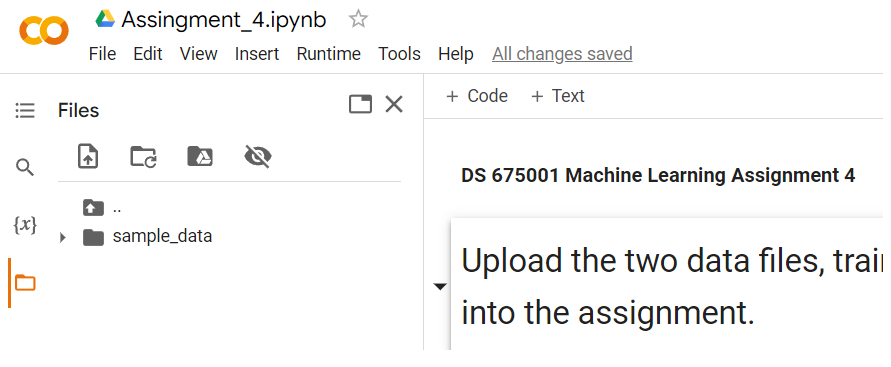




Each row represents a data sample. The first entry is the digit, and the next 256 entries are grayscale values between -1 and 1. These 256 pixels correspond to a 16 × 16 image.
        
Below, I have developed two features to measure the properties of the image (asymmetry and average density) that are useful in distinguishing between the digits 1 and 5. From the plot, we can see that digit 1 has relatively small values in both properties, indicating that digit 1 is more symmetric and has lower density.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV files
train_data = np.loadtxt('train_data.csv', delimiter=',')
test_data = np.loadtxt('test_data.csv', delimiter=',')

# Extract features and labels from the training and test data
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# Replace label values 5 with -1
y_train[y_train == 5] = -1
y_test[y_test == 5] = -1

# Find indices of positive (1) and negative (-1) labels in the train and test data
index_positive_train = np.where(y_train == 1)[0]
index_negative_train = np.where(y_train == -1)[0]

index_positive_test = np.where(y_test == 1)[0]
index_negative_test = np.where(y_test == -1)[0]

# Create asymmetric and density features
asymmetric_train = np.mean(np.abs(X_train - np.flip(X_train, axis=1), dtype=float), axis=1)
asymmetric_test = np.mean(np.abs(X_test - np.flip(X_test, axis=1), dtype=float), axis=1)
density_train = np.mean(X_train, axis=1)
density_test = np.mean(X_test, axis=1)

# Combine symmetric and density features
Train_feature = np.column_stack((asymmetric_train, density_train))
Test_feature = np.column_stack((asymmetric_test, density_test))

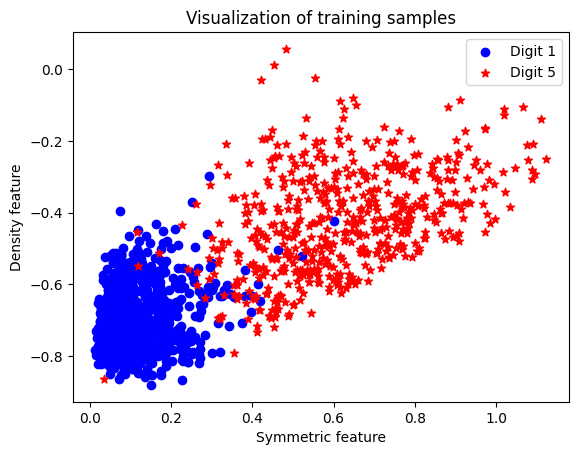

In [ ]:
# Plot the training samples
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')
plt.title('Visualization of training samples')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

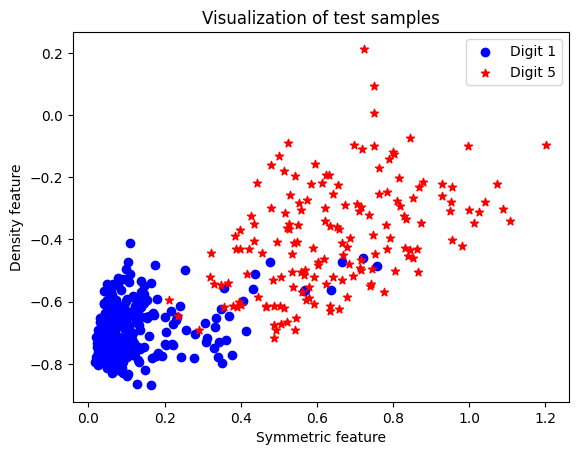

In [ ]:
# Plot the test samples
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')
plt.title('Visualization of test samples')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

# An example code for PLA.

Pocket Algorithm - In-Sample Error (Training): 2.56%
Pocket Algorithm - In-Sample Error (Test): 5.19%


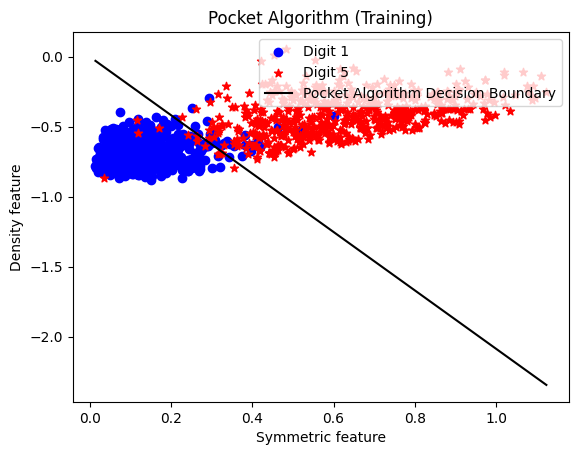

In [ ]:
# Initialize weights and bias
w = np.zeros(2)
b = 0

# Initialize the pocket weights
w_pocket = w.copy()
b_pocket = b

# PLA training
max_iterations = 1000
converged = False
iteration = 0

while not converged and iteration < max_iterations:
    converged = True

    for i in range(len(Train_feature)):
        x = Train_feature[i]
        y = y_train[i]

        if y * (np.dot(w, x) + b) <= 0:
            w += y * x
            b += y
            converged = False

        # Check if the current weight vector is better than the one in the pocket
        if converged:
            correct_pocket = 0
            for j in range(len(Train_feature)):
                if y_train[j] * (np.dot(w_pocket, Train_feature[j]) + b_pocket) > 0:
                    correct_pocket += 1

            if correct_pocket < len(Train_feature):
                w_pocket = w.copy()
                b_pocket = b

    iteration += 1

# Calculate predictions
predictions_train_pocket = []
for i in range(len(Train_feature)):
    x = Train_feature[i]
    prediction = np.sign(np.dot(w_pocket, x) + b_pocket)
    predictions_train_pocket.append(prediction)

predictions_test_pocket = []
for i in range(len(Test_feature)):
    x = Test_feature[i]
    prediction = np.sign(np.dot(w_pocket, x) + b_pocket)
    predictions_test_pocket.append(prediction)

# Calculate in-sample error
error_train_pocket = 1 - np.mean(np.array(predictions_train_pocket) == y_train)
error_test_pocket = 1 - np.mean(np.array(predictions_test_pocket) == y_test)

print("Pocket Algorithm - In-Sample Error (Training): {:.2f}%".format(error_train_pocket * 100))
print("Pocket Algorithm - In-Sample Error (Test): {:.2f}%".format(error_test_pocket * 100))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for Pocket Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = (-w_pocket[0] / w_pocket[1]) * x_decision_pocket - (b_pocket / w_pocket[1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Pocket Algorithm Decision Boundary')

plt.title('Pocket Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

# An example code for Pocket using pre-exist libraries.

Pocket Algorithm - In-Sample Error (Training): 2.43%
Pocket Algorithm - In-Sample Error (Test): 6.37%


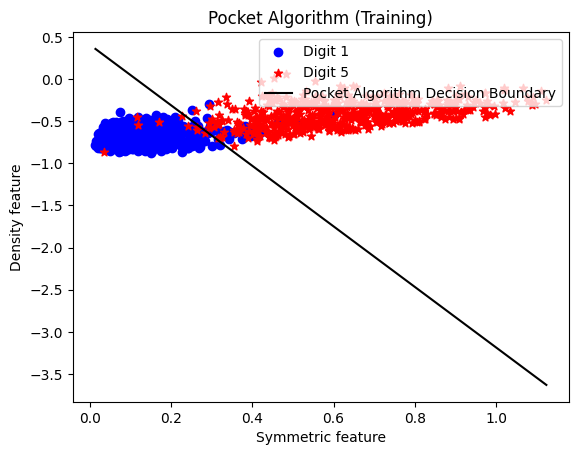

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Fit a perceptron model (Pocket Algorithm)
pocket_model = Perceptron(max_iter=1000)
pocket_model.fit(Train_feature, y_train)

# Calculate predictions
predictions_train_pocket = pocket_model.predict(Train_feature)
predictions_test_pocket = pocket_model.predict(Test_feature)

# Calculate in-sample error
error_train_pocket = 1 - accuracy_score(y_train, predictions_train_pocket)
error_test_pocket = 1 - accuracy_score(y_test, predictions_test_pocket)

print("Pocket Algorithm - In-Sample Error (Training): {:.2f}%".format(error_train_pocket * 100))
print("Pocket Algorithm - In-Sample Error (Test): {:.2f}%".format(error_test_pocket * 100))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for Pocket Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = (-pocket_model.coef_[0, 0] / pocket_model.coef_[0, 1]) * x_decision_pocket + (-pocket_model.intercept_ / pocket_model.coef_[0, 1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Pocket Algorithm Decision Boundary')

plt.title('Pocket Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

#Implement the following classification algorithms for non-separable data and provide the in-sample-error and visualization of the separating line for training and test data. The method of solving the question is mentioned with it


#1. Linear Regression for classification.
(Write the algorithm without using pre-existing Libraries )

Following are the points you should consider while answering the following:



1.   Calculate Predictions
2.   Calculate in-sample errors for test and train
3.   Visualize data points and plot the decision boundry.






<ipython-input-17-1f45567b2496>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


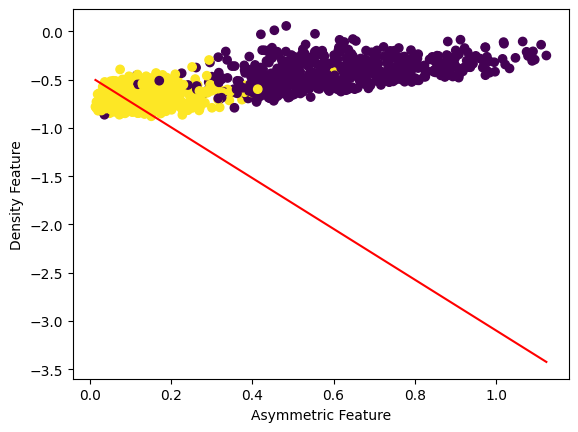

In [ ]:
# Concatenate a column of ones to the features to include bias term
X_train_bias = np.column_stack((np.ones(len(Train_feature)), Train_feature))
X_test_bias = np.column_stack((np.ones(len(Test_feature)), Test_feature))

# Initialize weights and learning rate
weights = np.zeros(X_train_bias.shape[1])
alpha = 0.01  # Learning rate
iterations = 1000

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the model using gradient descent
for iteration in range(iterations):
    # Calculate predictions using the current weights
    predictions = sigmoid(np.dot(X_train_bias, weights))

    # Calculate error
    error = predictions - y_train

    # Update weights using gradient descent
    gradient = np.dot(X_train_bias.T, error)
    weights -= alpha * gradient

# Make predictions on the test data
test_predictions = sigmoid(np.dot(X_test_bias, weights))

# Calculate in-sample errors for train and test
train_predictions = sigmoid(np.dot(X_train_bias, weights))
train_error = np.mean((train_predictions - y_train) ** 2)
test_error = np.mean((test_predictions - y_test) ** 2)

# Visualize the decision boundary
plt.scatter(Train_feature[:, 0], Train_feature[:, 1], c=y_train)
plt.xlabel('Asymmetric Feature')
plt.ylabel('Density Feature')

# Plot the decision boundary (assuming 2 features)
boundary_xs = np.array([np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0])])
boundary_ys = (-1 / weights[2]) * (weights[1] * boundary_xs + weights[0])
plt.plot(boundary_xs, boundary_ys, color='red')
plt.show()


#2. Using the initialization from the linear regression, implement pocket algorithm for improvement.

(Write the algorithm without using pre-existing Libraries )

Following are the points you should consider while answering the following:

1.  Define Pocket Algorithm
2.  Initialize the weights
3.  Calculate In sample error
4.  Visualize data points and plot the boundary.

(Tip: Your in-sample error for pocket algorithm should be less that the in-sample errors for regular linear regression)

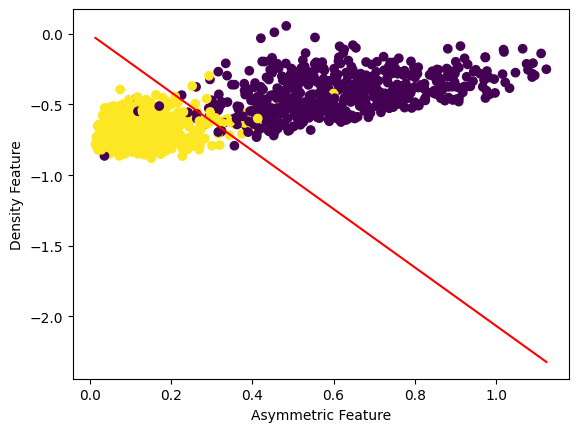

In [ ]:
# Concatenate a column of ones to the features to include bias term
X_train_bias = np.column_stack((np.ones(len(Train_feature)), Train_feature))
X_test_bias = np.column_stack((np.ones(len(Test_feature)), Test_feature))

# Initialize weights for Pocket Algorithm and learning parameters
pocket_weights = np.zeros(X_train_bias.shape[1])
current_weights = np.copy(pocket_weights)  # Initialize with linear regression weights
alpha = 0.01  # Learning rate
iterations = 1000

# Define the sign function to predict labels
def sign(x):
    return 1 if x > 0 else -1

# Calculate in-sample error function
def calculate_error(weights, X, y):
    errors = 0
    for i in range(len(X)):
        prediction = sign(np.dot(weights, X[i]))
        if prediction != y[i]:
            errors += 1
    return errors / len(X)

# Pocket Algorithm
pocket_error = calculate_error(pocket_weights, X_train_bias, y_train)
for iteration in range(iterations):
    # Calculate in-sample error for the current weights
    current_error = calculate_error(current_weights, X_train_bias, y_train)

    # If the current weights perform better, update the pocket weights
    if current_error < pocket_error:
        pocket_weights = np.copy(current_weights)
        pocket_error = current_error

    # Update weights using the perceptron update rule
    for i in range(len(X_train_bias)):
        prediction = sign(np.dot(current_weights, X_train_bias[i]))
        if prediction != y_train[i]:
            current_weights += alpha * y_train[i] * X_train_bias[i]

# Visualize the decision boundary using pocket weights
plt.scatter(Train_feature[:, 0], Train_feature[:, 1], c=y_train)
plt.xlabel('Asymmetric Feature')
plt.ylabel('Density Feature')

# Plot the decision boundary based on pocket weights
boundary_xs = np.array([np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0])])
boundary_ys = (-1 / pocket_weights[2]) * (pocket_weights[1] * boundary_xs + pocket_weights[0])
plt.plot(boundary_xs, boundary_ys, color='red')
plt.show()


#3. Implement Logistic regression for classification using gradident descent


Following are the points you should consider while answering the following:

1. Sigmoid function.
2. Define Gradient Descent for the model.
3. Fit the model using Gradient Descent.
4. Calculate in-sample errors for test and train data.
5. Visualize.

<ipython-input-19-3a95065de535>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


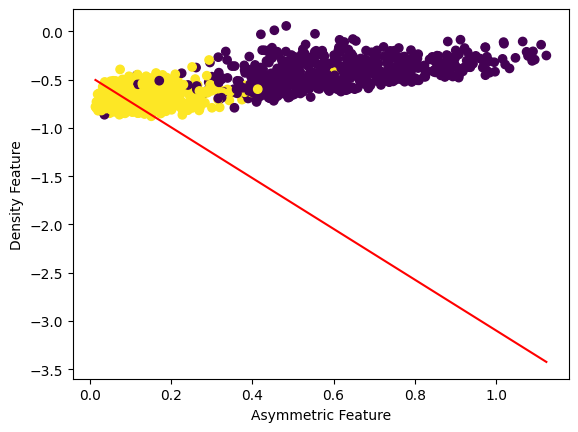

In [ ]:
# Concatenate a column of ones to the features to include bias term
X_train_bias = np.column_stack((np.ones(len(Train_feature)), Train_feature))
X_test_bias = np.column_stack((np.ones(len(Test_feature)), Test_feature))

# Initialize weights and learning parameters
weights = np.zeros(X_train_bias.shape[1])
alpha = 0.01  # Learning rate
iterations = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for iteration in range(iterations):
    predictions = sigmoid(np.dot(X_train_bias, weights))
    error = predictions - y_train
    gradient = np.dot(X_train_bias.T, error)
    weights -= alpha * gradient

# Make predictions on train and test data
train_predictions = sigmoid(np.dot(X_train_bias, weights))
test_predictions = sigmoid(np.dot(X_test_bias, weights))

# Calculate in-sample errors
train_error = np.mean((train_predictions - y_train) ** 2)
test_error = np.mean((test_predictions - y_test) ** 2)

# Visualize the decision boundary
plt.scatter(Train_feature[:, 0], Train_feature[:, 1], c=y_train)
plt.xlabel('Asymmetric Feature')
plt.ylabel('Density Feature')

# Plot the decision boundary (assuming 2 features)
boundary_xs = np.array([np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0])])
boundary_ys = (-1 / weights[2]) * (weights[1] * boundary_xs + weights[0])
plt.plot(boundary_xs, boundary_ys, color='red')
plt.show()

#4.  Implement Logistic regression for classification using mini-batch stochastic gradident descent

(Try to use pre-existing Libraries for this question from Sklearn)

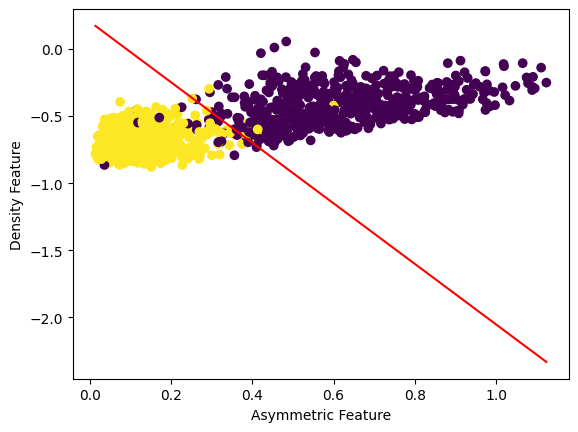

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data (use Train_feature, y_train, Test_feature, y_test)

# Create an instance of Logistic Regression with the desired parameters
logistic_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# Fit the model on the training data
logistic_model.fit(Train_feature, y_train)

# Make predictions on train and test data
train_predictions = logistic_model.predict(Train_feature)
test_predictions = logistic_model.predict(Test_feature)

# Calculate in-sample errors
train_error = np.mean(train_predictions != y_train)
test_error = np.mean(test_predictions != y_test)

# Visualize the decision boundary
plt.scatter(Train_feature[:, 0], Train_feature[:, 1], c=y_train)
plt.xlabel('Asymmetric Feature')
plt.ylabel('Density Feature')

# Plot the decision boundary (assuming 2 features)
coef = logistic_model.coef_[0]
intercept = logistic_model.intercept_

boundary_xs = np.array([np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0])])
boundary_ys = (-1 / coef[1]) * (coef[0] * boundary_xs + intercept)
plt.plot(boundary_xs, boundary_ys, color='red')
plt.show()


#5. Using a 3rd order polynomical transform, and implement linear regression for classification

(Use Pre-existing Libraries for this question)

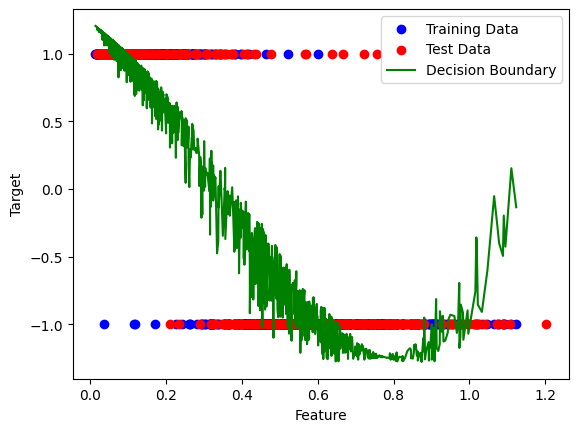

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Suppose Train_feature, y_train, Test_feature, y_test are already loaded

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(Train_feature)
X_test_poly = poly.transform(Test_feature)

# Initialize and fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Make predictions on train and test data
train_predictions = lin_reg.predict(X_train_poly)
test_predictions = lin_reg.predict(X_test_poly)

# Threshold predictions for classification (assuming binary classification)
train_predictions_class = np.where(train_predictions >= 0.5, 1, 0)
test_predictions_class = np.where(test_predictions >= 0.5, 1, 0)

# Calculate in-sample errors
train_error = np.mean(train_predictions_class != y_train)
test_error = np.mean(test_predictions_class != y_test)

# Sort the data based on features for smoother plot
sort_indices = np.argsort(Train_feature[:, 0])

plt.scatter(Train_feature[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(Test_feature[:, 0], y_test, color='red', label='Test Data')

# Sort the predictions based on the feature
plt.plot(Train_feature[sort_indices, 0], train_predictions[sort_indices], color='green', label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Target')

plt.legend()
plt.show()

